In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('adult.csv')
df.head()

39          State-gov   77516   Bachelors   13        Never-married   
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse  \
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40   
0     Exec-managerial         Husband   White     Male      0   0   13  \
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

In [21]:
df.shape

(32560, 15)

In [22]:
names = list(df.columns)
names

['39',
 ' State-gov',
 ' 77516',
 ' Bachelors',
 ' 13',
 ' Never-married',
 ' Adm-clerical',
 ' Not-in-family',
 ' White',
 ' Male',
 ' 2174',
 ' 0',
 ' 40',
 ' United-States',
 ' <=50K']

<Axes: xlabel=' <=50K'>

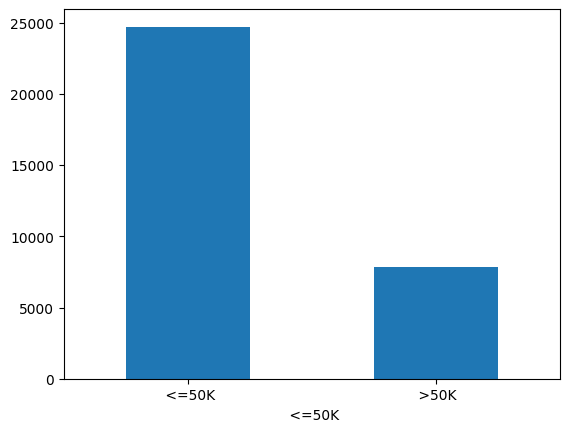

In [23]:
g = df[names[-1]].value_counts()
g.plot.bar(rot=0)

In [24]:
types = df.dtypes
types

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in range(len(types)):
    if types[i] == 'object':
        LE.fit_transform(df[names[i]])
        df[names[i]] = LE.transform(df[names[i]])

In [26]:
data = df.values
data[:2]

array([[    50,      6,  83311,      9,     13,      2,      4,      0,
             4,      1,      0,      0,     13,     39,      0],
       [    38,      4, 215646,     11,      9,      0,      6,      1,
             4,      1,      0,      0,     40,     39,      0]],
      dtype=int64)

In [27]:
x = data [:,:-1]
y = data [:,-1]
x.shape,y.shape

((32560, 14), (32560,))

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled[0]

array([0.45205479, 0.75      , 0.0482376 , 0.6       , 0.8       ,
       0.33333333, 0.28571429, 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.12244898, 0.95121951])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, random_state = 42, test_size=0.25)

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
Y_predict = dt.predict(X_test)

In [32]:
error = 0
for i in range (len(X_test)):
    # print (Y_test[i], Y_predict)
    if Y_test[i] != Y_predict[i]:
        error += 1
print(error)

1506


In [33]:
Y_test.shape

(8140,)

In [34]:
from sklearn.metrics import  accuracy_score
acc_score_dt = accuracy_score(Y_predict,Y_test)
acc_score_dt

0.8149877149877149

# Random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [36]:
Y_predict = rf.predict(X_test)

In [37]:
error = 0
for i in range (len(X_test)):
    # print (Y_test[i], Y_predict)
    if Y_test[i] != Y_predict[i]:
        error += 1
print(error)

1166


In [38]:
Y_test.shape

(8140,)

In [39]:
acc_score_rf = accuracy_score(Y_predict,Y_test)
acc_score_rf

0.8567567567567568

# SVM

In [40]:
from sklearn import svm
svm_classifier = svm.SVC(kernel = 'linear', gamma=.01, C = 50)
svm_classifier.fit(X_train,Y_train)
y_pred_svm = svm_classifier.predict(X_test)
print('predict:')
print(y_pred_svm)
print('true:')
print(Y_test)

acc_score_svm = accuracy_score(y_pred_svm,Y_test)
acc_score_svm

predict:
[0 0 0 ... 0 0 0]
true:
[0 0 1 ... 1 0 1]


0.818058968058968

In [47]:
import matplotlib.pyplot as plt
plt.bar (['DT','RF','SVM'],[acc_score_dt,acc_score_rf,acc_score_svm])

<BarContainer object of 3 artists>